<a href="https://colab.research.google.com/github/YugyeongJo/Movie-Dataset_Analysis_Project/blob/main/data_analysis/yugyeong/EDA_YG_KeywordVoteavg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Settings

In [ ]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,151 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.stats as stats

import json
import ast

# The Movies Dataset EDA
- 키워드와 고객 평점 data 중심

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset 불러오기

In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data 불러오기

# CSV 파일 경로 지정
file_path01 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/keywords.csv'
file_path02 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/original_movie_data/movies_metadata.csv'
file_path03 = '/content/drive/MyDrive/SeSac 데이터 AI개발과정 mini project/dataset/archive/csv/ratings.csv'

# CSV 파일을 DataFrame으로 읽어오기
df_keywords = pd.read_csv(file_path01)
df_meta = pd.read_csv(file_path02)
df_ratings = pd.read_csv(file_path03)

<ipython-input-6-cfe2f6f2e9ff>:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv(file_path02)


#### Function

In [ ]:
# json으로 되어있는 value 컬럼을 리스트로 변환
def parse_columns(x):
    try:
        return ast.literal_eval(x) if pd.notna(x) else {}
    except (ValueError, SyntaxError):
        return {}

#### Dataset 전처리

##### meta Dataset 전처리

In [ ]:
df_meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
df_meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df_meta_filtered = df_meta[['id', 'genres', 'imdb_id', 'original_title', 'title', 'overview', 'vote_average', 'vote_count']]

In [ ]:
df_meta_filtered

,id,genres,imdb_id,original_title,title,overview,vote_average,vote_count
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,6.9,2413.0
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,6.5,92.0
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0
4,11862,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,5.7,173.0
...,...,...,...,...,...,...,...,...
45461,439050,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",tt6209470,رگ خواب,Subdue,Rising and falling between a man and woman.,4.0,1.0
45462,111109,"[{'id': 18, 'name': 'Drama'}]",tt2028550,Siglo ng Pagluluwal,Century of Birthing,An artist struggles to finish his work while a...,9.0,3.0
45463,67758,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",tt0303758,Betrayal,Betrayal,"When one of her hits goes wrong, a professiona...",3.8,6.0
45464,227506,[],tt0008536,Satana likuyushchiy,Satan Triumphant,"In a small town live two brothers, one a minis...",0.0,0.0


In [ ]:
df_meta_filtered['genres'] = df_meta_filtered['genres'].apply(parse_columns)

<ipython-input-12-ac4b3c48d7d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_filtered['genres'] = df_meta_filtered['genres'].apply(parse_columns)


In [ ]:
# 'genres' 컬럼을 개별 행으로 펼치기
df_meta_expanded = df_meta_filtered.explode('genres')

In [ ]:
# 각 키워드를 별도의 열로 분리
df_meta_expanded['genres_id'] = df_meta_expanded['genres'].apply(lambda x: x['id'] if isinstance(x, dict) else None)
df_meta_expanded['genres_name'] = df_meta_expanded['genres'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

In [ ]:
df_meta_expanded = df_meta_expanded.drop(columns=['genres'])

In [ ]:
df_meta_expanded.head()

,id,imdb_id,original_title,title,overview,vote_average,vote_count,genres_id,genres_name
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,16.0,Animation
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,35.0,Comedy
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,10751.0,Family
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,6.9,2413.0,12.0,Adventure
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,6.9,2413.0,14.0,Fantasy


##### keywords Dataset 전처리

In [ ]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# 'keywords' 컬럼을 개별 행으로 펼치기
df_keywords['keywords'] = df_keywords['keywords'].apply(parse_columns)

In [ ]:
# 'keywords' 컬럼을 개별 행으로 펼치기
df_keywords_expanded = df_keywords.explode('keywords')

In [ ]:
# 각 키워드를 별도의 열로 분리
df_keywords_expanded['keywords_id'] = df_keywords_expanded['keywords'].apply(lambda x: x['id'] if isinstance(x, dict) else None)
df_keywords_expanded['keywords_name'] = df_keywords_expanded['keywords'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

In [ ]:
df_keywords_expanded = df_keywords_expanded.drop(columns=['keywords'])

In [ ]:
df_keywords_expanded.head()

,id,keywords_id,keywords_name
0,862,931.0,jealousy
0,862,4290.0,toy
0,862,5202.0,boy
0,862,6054.0,friendship
0,862,9713.0,friends


##### ratings Dataset 전처리

In [ ]:
df_ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
# 매핑 컬럼 확인
df_ratings[df_ratings['movieId'] == 862]

,userId,movieId,rating,timestamp
184624,1923,862,3.0,858335006
200490,2103,862,5.0,946044912
524001,5380,862,1.0,878941641
610887,6177,862,4.0,859415226
643892,6525,862,4.0,857388995
...,...,...,...,...
25788364,268336,862,4.0,955427492
25798428,268391,862,3.0,856529977
25814740,268568,862,2.0,943826734
25980015,270422,862,4.0,941664133


#### Dataset별 EDA

##### metadata dataset EDA
-

##### keywords dataset EDA
- 이상치, 결측치 처리
- 영화별 keyword 개수 확인
- 가장 많이 언급된 keyword 확인
- keyword별 영화 평점 분석


In [ ]:
df_keywords_expanded

,id,keywords_id,keywords_name
0,862,931.0,jealousy
0,862,4290.0,toy
0,862,5202.0,boy
0,862,6054.0,friendship
0,862,9713.0,friends
...,...,...,...
46415,111109,14531.0,play
46415,111109,215397.0,pinoy
46416,67758,NaN,None
46417,227506,NaN,None


In [ ]:
# 인덱스 재설정
df_keywords_expanded = df_keywords_expanded.reset_index(drop=True)
df_keywords_expanded

,id,keywords_id,keywords_name
0,862,931.0,jealousy
1,862,4290.0,toy
2,862,5202.0,boy
3,862,6054.0,friendship
4,862,9713.0,friends
...,...,...,...
173470,111109,14531.0,play
173471,111109,215397.0,pinoy
173472,67758,NaN,None
173473,227506,NaN,None


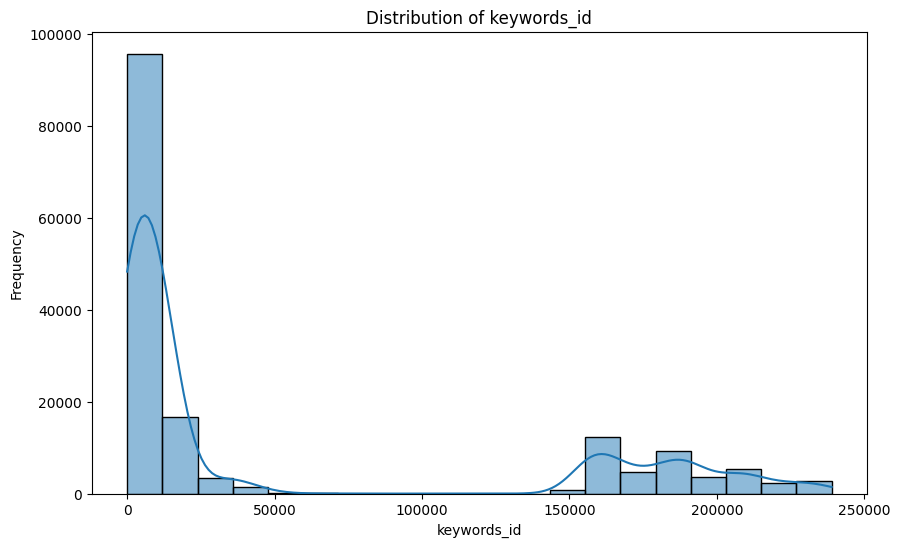

In [ ]:
# 데이터 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df_keywords_expanded['keywords_id'], bins=20, kde=True)
plt.title('Distribution of keywords_id')
plt.xlabel('keywords_id')
plt.ylabel('Frequency')
plt.show()

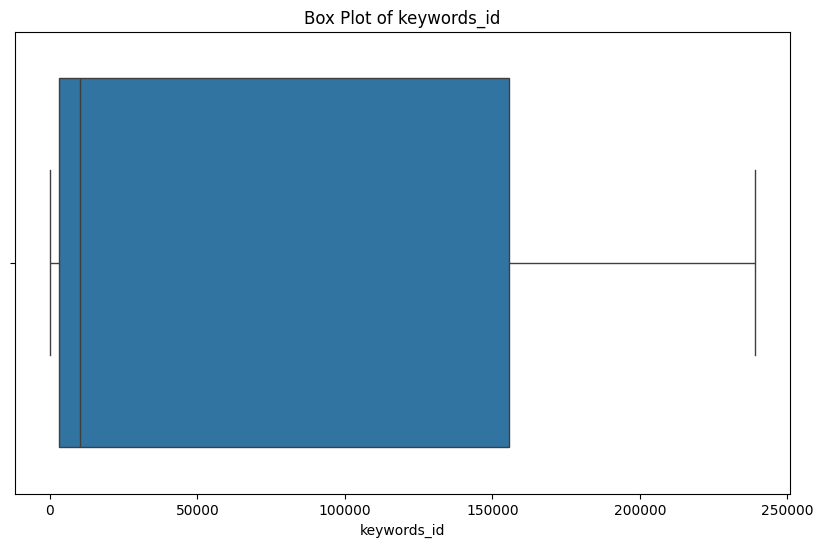

In [ ]:
# 이상치
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_keywords_expanded['keywords_id'])
plt.title('Box Plot of keywords_id')
plt.show()

In [ ]:
from scipy.stats import zscore

# z-점수 계산
df_keywords_expanded['zscore'] = zscore(df_keywords_expanded['keywords_id'].dropna())

# z-점수가 3 초과인 이상치 확인
outliers = df_keywords_expanded[df_keywords_expanded['zscore'].abs() > 3]
outliers

# zscore를 통한 이상치 확인 결과 zscore가 3 을 초과하는 값이 없음 = 데이터의 분포가 균일하다
# zscore는 데이터의 평균으로부터 얼마나 떨어져 있는지를 표준편차 단위로 나타낸 값

,id,keywords_id,keywords_name,zscore


In [ ]:
# 데이터 요약
df_keywords_expanded.describe()

# mean(평균)이 0에 가까운 것은 데이터가 잘 표준화되었다는 의미
# std(표준편차)가 1에 가까운 것은 zscore의 표준화가 잘 되었음을 의미
# zscore가 3을 초과하거나 -3을 미만인 값을 이상치로 간주

,id,keywords_id,zscore
count,173475.000000,158680.000000,1.586800e+05
mean,82955.241164,53720.845897,-1.003035e-17
std,106805.897954,78863.499700,1.000003e+00
min,2.000000,30.000000,-6.808094e-01
25%,11569.000000,3098.000000,-6.419067e-01
50%,36915.000000,10084.000000,-5.533229e-01
75%,102337.000000,155532.000000,1.290983e+00
max,469172.000000,238884.000000,2.347902e+00


In [ ]:
# 결측값
df_keywords_expanded.isnull().sum()

,0
id,0
keywords_id,14795
keywords_name,14795
zscore,14795


<Axes: >

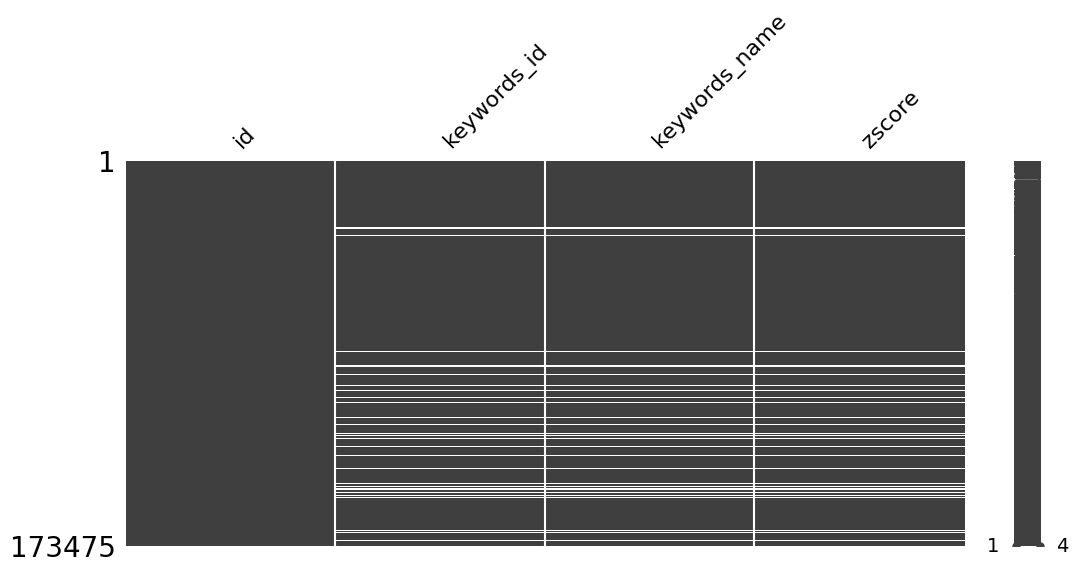

In [ ]:
# 결측치 시각화
import missingno as msno
msno.matrix(df_keywords_expanded, figsize=(12, 5))

In [ ]:
# 결측값 비율 확인
missing_percentage = df_keywords_expanded.isnull().mean() * 100
missing_percentage

,0
id,0.000000
keywords_id,8.528606
keywords_name,8.528606
zscore,8.528606


In [ ]:
# 영화별 키워드 개수
movie_keyword_counts = df_keywords_expanded.groupby('id')['keywords_name'].count().reset_index()
movie_keyword_counts.columns = ['id', 'keyword_count']

In [ ]:
# 키워드별 언급 횟수
keyword_counts = df_keywords_expanded['keywords_name'].value_counts().reset_index()
keyword_counts.columns = ['keywords_name', 'count']

In [ ]:
# 영화별 키워드 개수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='id', y='keyword_count', data=movie_keyword_counts)
plt.title('Number of Keywords per Movie')
plt.xlabel('Movie ID')
plt.ylabel('Keyword Count')
plt.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.


In [ ]:
# 가장 많이 언급된 키워드 시각화 (상위 10개)
plt.figure(figsize=(14, 7))
sns.barplot(x='count', y='keywords_name', data=keyword_counts.head(10))
plt.title('Top 10 Most Mentioned Keywords')
plt.xlabel('Count')
plt.ylabel('Keywords')
plt.show()

##### ratings dataset EDA
-

# 추가

In [ ]:
df_meta_expanded

,id,imdb_id,original_title,title,overview,vote_average,vote_count,genres_id,genres_name
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,16.0,Animation
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,35.0,Comedy
0,862,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,10751.0,Family
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,6.9,2413.0,12.0,Adventure
1,8844,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,6.9,2413.0,14.0,Fantasy
...,...,...,...,...,...,...,...,...,...
45463,67758,tt0303758,Betrayal,Betrayal,"When one of her hits goes wrong, a professiona...",3.8,6.0,28.0,Action
45463,67758,tt0303758,Betrayal,Betrayal,"When one of her hits goes wrong, a professiona...",3.8,6.0,18.0,Drama
45463,67758,tt0303758,Betrayal,Betrayal,"When one of her hits goes wrong, a professiona...",3.8,6.0,53.0,Thriller
45464,227506,tt0008536,Satana likuyushchiy,Satan Triumphant,"In a small town live two brothers, one a minis...",0.0,0.0,NaN,None


In [ ]:
df_keywords_expanded

,id,keywords_id,keywords_name,zscore
0,862,931.0,jealousy,-0.669385
1,862,4290.0,toy,-0.626792
2,862,5202.0,boy,-0.615228
3,862,6054.0,friendship,-0.604424
4,862,9713.0,friends,-0.558027
...,...,...,...,...
173470,111109,14531.0,play,-0.496934
173471,111109,215397.0,pinoy,2.050082
173472,67758,NaN,None,NaN
173473,227506,NaN,None,NaN


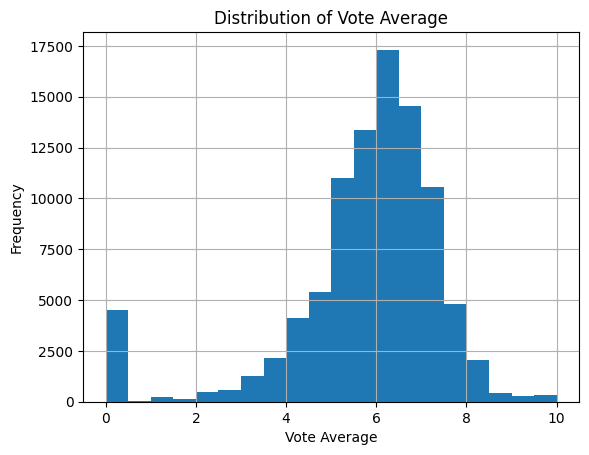

In [ ]:
# vote_average 히스토그램
import matplotlib.pyplot as plt

df_meta_expanded['vote_average'].hist(bins=20)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 열 라벨 중복 확인
print(df_meta_expanded.columns[df_meta_expanded.columns.duplicated()])

Index([], dtype='object')


In [ ]:
# 중복 열 라벨 제거
df_meta_expanded = df_meta_expanded.loc[:, ~df_meta_expanded.columns.duplicated()]

ValueError: cannot reindex on an axis with duplicate labels

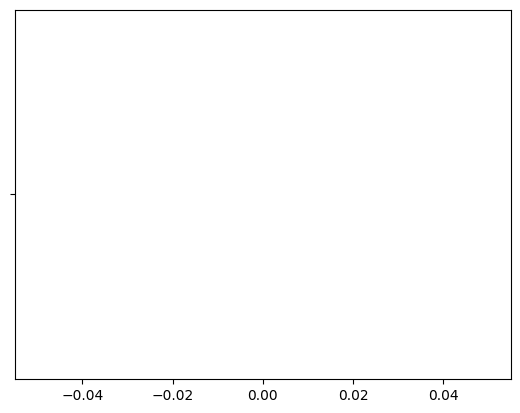

In [ ]:
# vote_average 박스플롯
import seaborn as sns
import matplotlib.pyplot as plt

# 박스 플롯 생성
sns.boxplot(x=df_meta_expanded['vote_average'])
plt.title('Boxplot of Vote Average')
plt.xlabel('Vote Average')
plt.show()


In [ ]:
# kewords

In [ ]:
# 시간에 따른 변화 분석
# 연도별 평균 평점 시각화
df_meta_expanded['release_year'] = pd.to_datetime(df_meta_expanded['release_date']).dt.year
avg_vote_by_year = df_meta_expanded.groupby('release_year')['vote_average'].mean()

avg_vote_by_year.plot(kind='line')
plt.title('Average Vote Average by Year')
plt.xlabel('Year')
plt.ylabel('Average Vote Average')
plt.show()

KeyError: 'release_date'

In [ ]:
# 워드클라우드
from wordcloud import WordCloud

# 키워드 문자열을 리스트로 변환하고 평탄화
text = ' '.join(all_keywords)

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

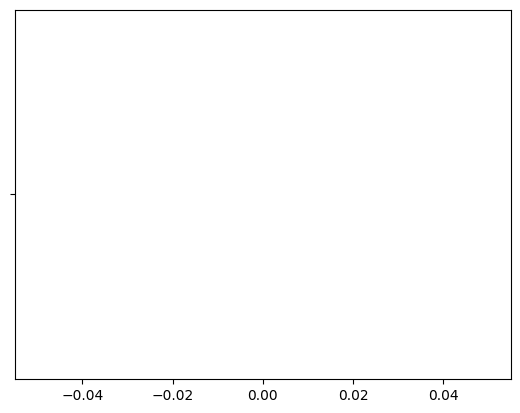

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_meta_expanded['vote_average'])
plt.title('Boxplot of Vote Average')
plt.xlabel('Vote Average')
plt.show()